## Imports

In [7]:
# Standard
import json
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Scale
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression

# Scoring
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


## Data

In [8]:
file_name = 'train_gb'
train = pd.read_pickle(f'..\\processed_data\\{file_name}.pki')

file_name = 'test_gb'
test = pd.read_pickle(f'..\\processed_data\\{file_name}.pki')

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI,BalanceIncome
0,LP001002,1,0,0,0,0,1.0,2,1,5849.0,0.347222,5848.652778
1,LP001003,1,1,1,0,0,1.0,0,0,6091.0,0.355556,6090.644444
2,LP001005,1,1,0,0,1,1.0,2,1,3000.0,0.183333,2999.816667
3,LP001006,1,1,0,1,0,1.0,2,1,4941.0,0.333333,4940.666667
4,LP001008,1,0,0,0,0,1.0,2,1,6000.0,0.391667,5999.608333


In [ ]:
test.head()

In [11]:
X = train.drop(['Loan_ID', 'Loan_Status'], axis = 1)
y = train['Loan_Status']
print(X.head())
print(y.head())

     Gender  Married Dependents  Education  Self_Employed  Credit_History  \
91        1        1          2          0              0             1.0   
235       1        1          1          0              0             1.0   
289       1        0          0          0              0             1.0   
386       1        0          0          1              0             1.0   
238       0        0          1          0              0             1.0   

     Property_Area  TotalIncome       EMI  BalanceIncome  
91               1      11904.0  1.044444   11902.955556  
235              0       6760.0  0.472222    6759.527778  
289              0       9508.0  0.519444    9507.480556  
386              1       3946.0  0.366667    3945.633333  
238              0       3812.0  0.311111    3811.688889  
91     1
235    1
289    1
386    1
238    1
Name: Loan_Status, dtype: int32


In [12]:
y.value_counts()

Loan_Status
1    304
0    133
Name: count, dtype: int64

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

## Hyper-parameter Training Logistic Regression

In [33]:
# Find the Best Model
param_grid = {
    'penalty': ['l2', None],
    'C': [_ * .01 for _ in range(1, 1001, 10)],
    'solver' : ['lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid=param_grid, cv=5,scoring='f1_weighted', verbose=100, n_jobs=-1)
grid_search.fit(X_train_scaled, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.11, 0.21, 0.31, 0.41000000000000003,
                               0.51, 0.61, 0.71, 0.81, 0.91, 1.01, 1.11, 1.21,
                               1.31, 1.41, 1.51, 1.61, 1.71, 1.81,
                               1.9100000000000001, 2.0100000000000002, 2.11,
                               2.21, 2.31, 2.41, 2.5100000000000002, 2.61, 2.71,
                               2.81, 2.91, ...],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1_weighted', verbose=100)

In [42]:
# Find the Best Model
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [_ * .01 for _ in range(1, 1001, 10)],
    'solver' : ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid=param_grid, cv=5,scoring='f1_weighted', verbose=100, n_jobs=-1)
grid_search.fit(X_train_scaled, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.11, 0.21, 0.31, 0.41000000000000003,
                               0.51, 0.61, 0.71, 0.81, 0.91, 1.01, 1.11, 1.21,
                               1.31, 1.41, 1.51, 1.61, 1.71, 1.81,
                               1.9100000000000001, 2.0100000000000002, 2.11,
                               2.21, 2.31, 2.41, 2.5100000000000002, 2.61, 2.71,
                               2.81, 2.91, ...],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1_weighted', verbose=100)

In [43]:
# Find the Best Model
param_grid = {
    'penalty': ['l2', None],
    'C': [_ * .01 for _ in range(1, 1001, 10)],
    'solver' : ['newton-cg']
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid=param_grid, cv=5,scoring='f1_weighted', verbose=100, n_jobs=-1)
grid_search.fit(X_train_scaled, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.11, 0.21, 0.31, 0.41000000000000003,
                               0.51, 0.61, 0.71, 0.81, 0.91, 1.01, 1.11, 1.21,
                               1.31, 1.41, 1.51, 1.61, 1.71, 1.81,
                               1.9100000000000001, 2.0100000000000002, 2.11,
                               2.21, 2.31, 2.41, 2.5100000000000002, 2.61, 2.71,
                               2.81, 2.91, ...],
                         'penalty': ['l2', None], 'solver': ['newton-cg']},
             scoring='f1_weighted', verbose=100)

In [52]:
# Find the Best Model
param_grid = {
    'penalty': ['l2', None],
    'C': [_ * .01 for _ in range(1, 1001, 10)],
    'solver' : ['newton-cholesky']
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid=param_grid, cv=5,scoring='f1_weighted', verbose=100, n_jobs=-1)
grid_search.fit(X_train_scaled, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.11, 0.21, 0.31, 0.41000000000000003,
                               0.51, 0.61, 0.71, 0.81, 0.91, 1.01, 1.11, 1.21,
                               1.31, 1.41, 1.51, 1.61, 1.71, 1.81,
                               1.9100000000000001, 2.0100000000000002, 2.11,
                               2.21, 2.31, 2.41, 2.5100000000000002, 2.61, 2.71,
                               2.81, 2.91, ...],
                         'penalty': ['l2', None],
                         'solver': ['newton-cholesky']},
             scoring='f1_weighted', verbose=100)

In [61]:
# Find the Best Model
param_grid = {
    'penalty': ['l2', None],
    'C': [_ * .01 for _ in range(1, 1001, 10)],
    'solver' : ['sag']
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid=param_grid, cv=5,scoring='f1_weighted', verbose=100, n_jobs=-1)
grid_search.fit(X_train_scaled, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.11, 0.21, 0.31, 0.41000000000000003,
                               0.51, 0.61, 0.71, 0.81, 0.91, 1.01, 1.11, 1.21,
                               1.31, 1.41, 1.51, 1.61, 1.71, 1.81,
                               1.9100000000000001, 2.0100000000000002, 2.11,
                               2.21, 2.31, 2.41, 2.5100000000000002, 2.61, 2.71,
                               2.81, 2.91, ...],
                         'penalty': ['l2', None], 'solver': ['sag']},
             scoring='f1_weighted', verbose=100)

In [80]:
# Find the Best Model
param_grid = {
    'penalty': ['elasticnet', 'l1', 'l2', None],
    'C': [_ * .01 for _ in range(1, 1001, 10)],
    'solver' : ['saga'],
    'l1_ratio' : [_ * .1 for _ in range(1, 10)]
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid=param_grid, cv=5,scoring='f1_weighted', verbose=100, n_jobs=-1)
grid_search.fit(X_train_scaled, y)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


C:\Users\gs457\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.11, 0.21, 0.31, 0.41000000000000003,
                               0.51, 0.61, 0.71, 0.81, 0.91, 1.01, 1.11, 1.21,
                               1.31, 1.41, 1.51, 1.61, 1.71, 1.81,
                               1.9100000000000001, 2.0100000000000002, 2.11,
                               2.21, 2.31, 2.41, 2.5100000000000002, 2.61, 2.71,
                               2.81, 2.91, ...],
                         'l1_ratio': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                      0.6000000000000001, 0.7000000000000001,
                                      0.8, 0.9],
                         'penalty': ['elasticnet', 'l1', 'l2', None],
                         'solver': ['saga']},
             scoring='f1_weighted', verbose=100)

In [81]:
grid_search.best_params_

{'C': 0.11, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [82]:
model = grid_search.best_estimator_

## Scoring

In [83]:
X_test, y_test = test.drop(columns=['Loan_ID', 'Loan_Status']), test['Loan_Status']

### Scale Data

In [84]:
X_test_scaled = scaler.fit_transform(X_test)

In [85]:
y_pred = model.predict(X_test_scaled)

In [86]:
f1_score(y_pred = y_pred, y_true=y_test)

0.8622222222222222

In [87]:
accuracy_score(y_pred = y_pred, y_true=y_test)

0.7876712328767124

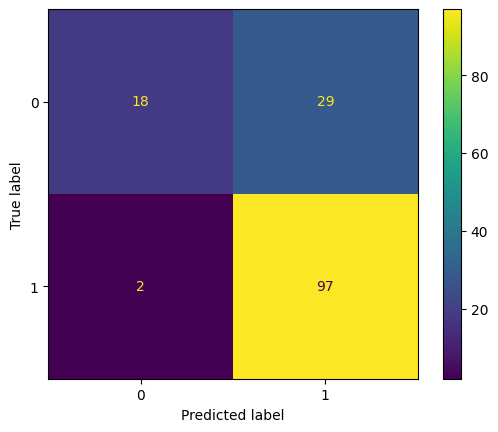

In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred = y_pred, y_true=y_test), display_labels=model.classes_)
disp.plot()
plt.show()